# Unit 3. 활성화 함수(Activation function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- heaviside function

In [2]:
def heaviside(x):
    y = np.zeros(x.size)
    y[x > 0] = 1          # x <= 0 이면 0, x > 0 이면 1
    return y

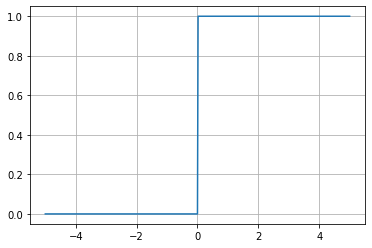

In [3]:
xs = np.linspace(-5,5,501)
ys = heaviside(xs)
plt.plot(xs, ys)
plt.grid()
plt.show()

In [4]:
xs[:5]

array([-5.  , -4.98, -4.96, -4.94, -4.92])

In [7]:
np.array(xs > 0)[-5:]

array([ True,  True,  True,  True,  True])

In [10]:
def step(x):
    return np.array(x > 0, dtype=np.int32)

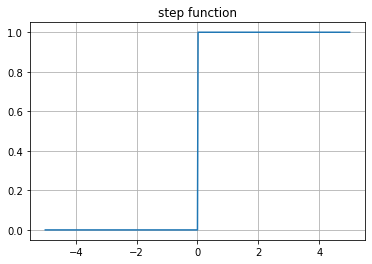

In [11]:
ys = step(xs)
plt.plot(xs, ys)
plt.title('step function')
plt.grid()
plt.show()

- sigmoid function

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
sigmoid(np.array([-10,-5,0,5,10]))

array([4.53978687e-05, 6.69285092e-03, 5.00000000e-01, 9.93307149e-01,
       9.99954602e-01])

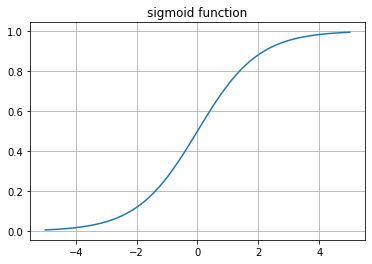

In [14]:
ys = sigmoid(xs)
plt.plot(xs, ys)
plt.title('sigmoid function')
plt.grid()
plt.show()

- hyperbolic tangent function

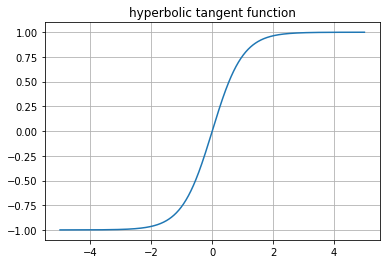

In [15]:
ys = np.tanh(xs)
plt.plot(xs, ys)
plt.title('hyperbolic tangent function')
plt.grid()
plt.show()

- relu function

In [16]:
def relu(x):
    return np.maximum(0, x)

In [17]:
relu(np.array([-10,-5,0,5,10]))

array([ 0,  0,  0,  5, 10])

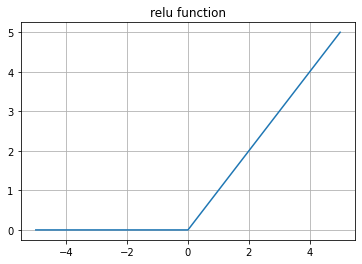

In [18]:
ys = relu(xs)
plt.plot(xs, ys)
plt.title('relu function')
plt.grid()
plt.show()

- leaky relu function

In [19]:
def leaky_relu(x):
    return np.maximum(0.01*x, x)

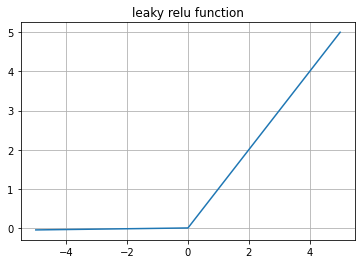

In [20]:
ys = leaky_relu(xs)
plt.plot(xs, ys)
plt.title('leaky relu function')
plt.grid()
plt.show()

- softplus function

In [21]:
def softplus(x):
    return np.log(1 + np.exp(x))

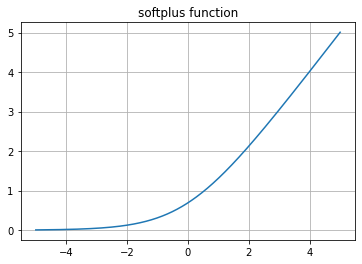

In [22]:
ys = softplus(xs)
plt.plot(xs, ys)
plt.title('softplus function')
plt.grid()
plt.show()

- 종합

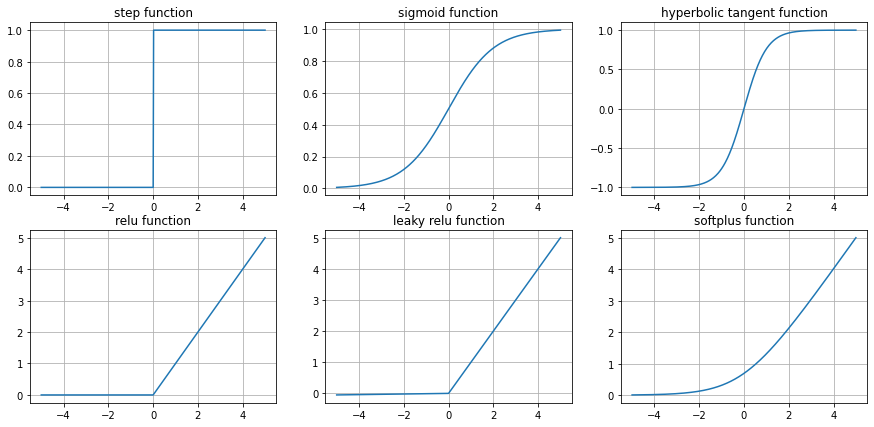

In [23]:
plt.figure(figsize=(15,7))
plt.subplot(231)
plt.plot(xs, step(xs)), plt.title('step function'), plt.grid()
plt.subplot(232)
plt.plot(xs, sigmoid(xs)), plt.title('sigmoid function'), plt.grid()
plt.subplot(233)
plt.plot(xs, np.tanh(xs)), plt.title('hyperbolic tangent function'), plt.grid()
plt.subplot(234)
plt.plot(xs, relu(xs)), plt.title('relu function'), plt.grid()
plt.subplot(235)
plt.plot(xs, leaky_relu(xs)), plt.title('leaky relu function'), plt.grid()
plt.subplot(236)
plt.plot(xs, softplus(xs)), plt.title('softplus function'), plt.grid()
plt.show()

- softmax

In [24]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)   # overflow 방지
    return np.exp(x) / np.sum(np.exp(x))

In [25]:
yhat = np.array([-1, 2.1, 3, 5])
softmax(yhat)

array([0.00207803, 0.04612802, 0.11345662, 0.83833733])

In [26]:
np.sum(softmax(yhat))

1.0

In [27]:
np.random.seed = 2022
yhat = np.random.normal(size=(3,4))
yhat

array([[ 1.01223221, -0.48562551, -0.66804044,  0.40145815],
       [ 1.87006609, -0.24157015,  0.40845143, -1.38217913],
       [ 1.83935813, -0.57022492, -1.18926154,  0.64694474]])

In [28]:
softmax(yhat)

array([[0.51206888, 0.11450305, 0.0954103 , 0.27801778],
       [0.71860319, 0.08697955, 0.16661648, 0.02780078],
       [0.69361448, 0.06232317, 0.03355872, 0.21050363]])